# Тестовое задание в команду продуктовой аналитики, Gett.

В папке с заданием два датасета - data_orders - содержит выборку данных по заказам пользователей и включает такие колонки как:
* order_datetime -  время заказа
* origin_longitude - долгота
* origin_latitude - широта
* m_order_eta - время до прибытия машины
* order_gk - номер заказа
* order_status_key - статус (4 - отменен клиентом, 9 - отменен системой (reject))
* is_driver_assigned_key - был ли назначен водитель
* cancellations_time_in_seconds - сколько секунд прошло до отмены

data_offers - содержит пары номер заказа - ID оффера, который был предложен водителю по данному заказу.


В момент когда клиент нажимать на кнопку "Заказать" в приложении, система матчинга подыскивает наиболее релевантых водителей и предлагаем им заказ. В задании предлагается исследовать некоторые метрики матчинга для заказов, которые не завершились успешно (клиент в итоге не получил машину). 

**0.** Подготовка данных

In [1]:
## CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
data_offers_df=pd.read_csv('data_offers.csv')
data_orders_df=pd.read_csv('data_orders.csv')
data_orders_df['order_status_key']=data_orders_df['order_status_key'].map(lambda x: 'отменен клиентом' if x==4 else 'отменен системой')
data_orders_df['is_driver_assigned_key']=data_orders_df['is_driver_assigned_key'].map(lambda x: 'Водитель назначен' if x==0 else 'Водитель не назначен')
data_orders_df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,отменен клиентом,Водитель не назначен,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,отменен клиентом,Водитель назначен,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,отменен клиентом,Водитель не назначен,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,отменен клиентом,Водитель не назначен,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,отменен системой,Водитель назначен,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,отменен клиентом,Водитель назначен,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,отменен клиентом,Водитель назначен,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,отменен клиентом,Водитель не назначен,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,отменен клиентом,Водитель назначен,6.0


In [2]:
data_offers_df

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


**1.** Постройте распределение заказов по причинам неуспеха: отмены до и после назначения водителя, режекты

In [3]:
status_driver=data_orders_df[['order_status_key','is_driver_assigned_key', 'order_gk']].groupby(['order_status_key','is_driver_assigned_key']).agg({'order_gk':'count'}).reset_index()
status_driver['reason']=status_driver['is_driver_assigned_key']+': '+status_driver['order_status_key']

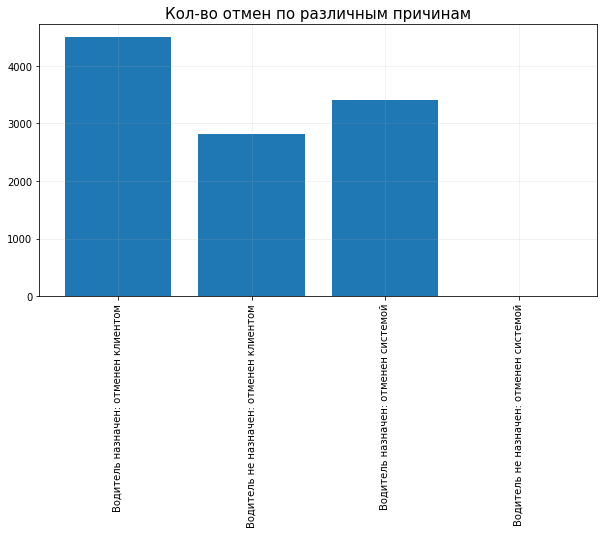

In [4]:
## CODE HERE
%matplotlib inline
register_matplotlib_converters()
fig, subplot = plt.subplots(figsize=(10,5))
y_ticks=np.array(status_driver['order_gk'])
x_ticks=np.array(status_driver['reason'])
subplot.bar(x_ticks,y_ticks)
subplot.set_title('Кол-во отмен по различным причинам', fontsize=15)
plt.grid(linewidth=0.5, alpha=0.3)
plt.xticks(x_ticks, rotation='vertical')
plt.show()

Проанализируйте полученный график - в какой категории наибольшое количество заказов?

*Место для ответа*

Я не совсем до конца понял вопрос, но так как отмены и назначения водителя являются разными столбцами, то все-таки решил группировать, надеюсь, что это и требовалось.
В соответствии с графиком наибольшее количество заказов в категории <b>"Водитель назначен: отменен клиентом"</b>

**2.** Постройте график распределения фейлов по часам - наблюдается ли тендеция, что в какие то часы доля той или иной категории аномально высока?

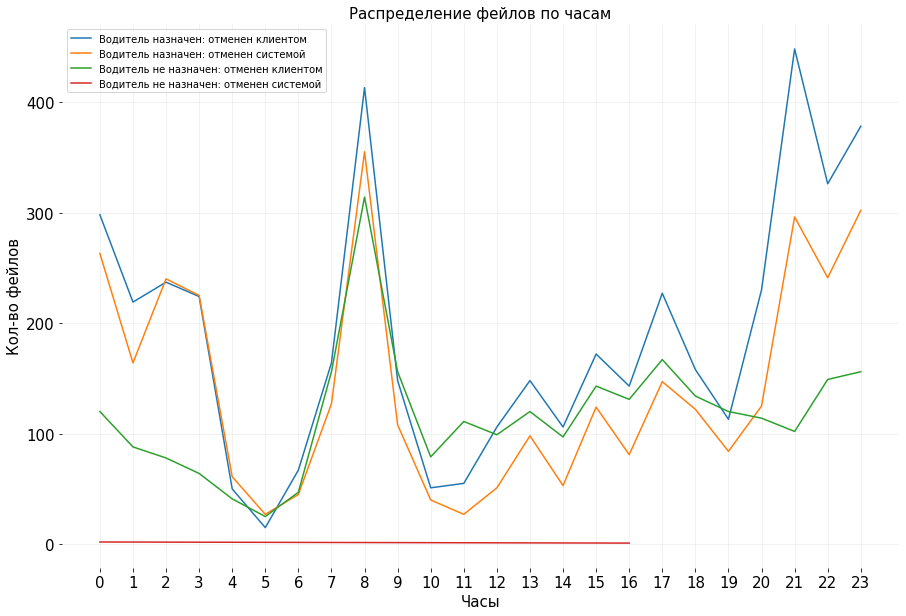

In [5]:
## CODE HERE
hour_fails=data_orders_df.loc[:,['order_datetime','order_status_key','is_driver_assigned_key']]
hour_fails['order_datetime']=pd.to_datetime(hour_fails['order_datetime']).map(lambda x: x.hour)
hour_fails['reason']=hour_fails['is_driver_assigned_key']+': '+hour_fails['order_status_key']
hour_fails_grouped=pd.DataFrame(hour_fails[['order_datetime', 'reason']].groupby(['order_datetime','reason']).size()).reset_index()
reason=hour_fails_grouped['reason'].unique()
%matplotlib inline
register_matplotlib_converters()
fig, subplot = plt.subplots(figsize=(15,10))
for i in reason:
    fails=hour_fails_grouped[hour_fails_grouped['reason']==i]
    y_ticks=np.array(fails[0])
    x_ticks=np.array(fails['order_datetime'])
    subplot.plot(x_ticks,y_ticks)
plt.xticks(np.array(hour_fails_grouped['order_datetime'].unique()), fontsize=10)
plt.ylabel('Кол-во фейлов', fontsize=15)
plt.xlabel('Часы', fontsize=15)
plt.title('Распределение фейлов по часам', fontsize=15)
subplot.legend(reason, loc=2)
plt.grid(linewidth=0.5, alpha=0.3)
subplot.set_frame_on(False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

В какие часы фейлов больше всего? Чем это можно объяснить?

*Место для ответа*
Самое высокое кол-во фейлов идет:

1) В промежутке с 8 до 9, так как думаю в это время вырастает общее кол-во заказов, потому что все утром спешат на работу.

2) В промежутке с 17 до 18, так как многие едут домой с работы или по делам, но при этом доля меньше, так как спешки уже нет

3) В промежутке с 21 до 22 и с 23 до 24. Так как это довольно-таки позднее время, кто-то устал, кто-то напился, соответственно кол-во заказов растет. При этом в промежутке с 23 до 24 резко вырастает доля заказов, где водитель был назначен, но заказ отменил клиент, а доля где водитель не был назначен - падает. Думаю, просто связано с тем, что система в это время быстрее успевает назначить водителя, так как может быть попросту больше такси выходит на работу

**3**. Постройте графики среднего времени до отмены (cancellations_time_in_seconds) с водителем и без, по часам. Если есть выбросы в данных - лучше удалить. Можно ли сделать выводы по этому графику?

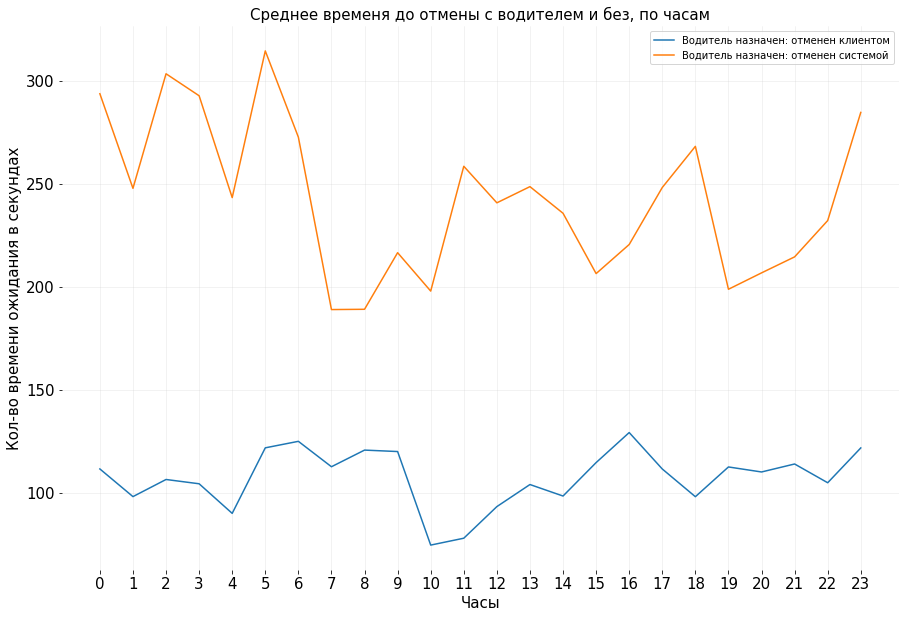

In [6]:
## CODE HERE
cancellations_time=data_orders_df.loc[:,['order_datetime','is_driver_assigned_key','cancellations_time_in_seconds']]
cancellations_time['order_datetime']=pd.to_datetime(cancellations_time['order_datetime']).map(lambda x: x.hour)
cancellations_time.dropna(inplace=True)
cancellations_time_grouped=cancellations_time.groupby(['order_datetime','is_driver_assigned_key']).agg({'cancellations_time_in_seconds': 'mean'}).reset_index()
driver=cancellations_time_grouped['is_driver_assigned_key'].unique()
%matplotlib inline
register_matplotlib_converters()
fig, subplot = plt.subplots(figsize=(15,10))
for i in driver:
    fails=cancellations_time_grouped[cancellations_time_grouped['is_driver_assigned_key']==i]
    y_ticks=np.array(fails['cancellations_time_in_seconds'])
    x_ticks=np.array(fails['order_datetime'])
    subplot.plot(x_ticks,y_ticks)
plt.ylabel('Кол-во времени ожидания в секундах', fontsize=15)
plt.xlabel('Часы', fontsize=15)
plt.title('Среднее временя до отмены с водителем и без, по часам', fontsize=15)
plt.xticks(np.array(cancellations_time_grouped['order_datetime'].unique()), fontsize=10)
subplot.legend(reason, loc=1)
plt.grid(linewidth=0.5, alpha=0.3)
subplot.set_frame_on(False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

*Место для ответа*

Случай, когда отменяет система имеет намного большее время ожидания, особенно ночью-ранным утром или вечером. Можно сказать, что пользователи долго не думают перед тем как отменить, а если не отменили в первые 2 минуты, то скорее всего уже не отменят и будут ждать

**4.** Постройте распределение среднего ЕТА по часам. Чем можно объяснить такой вид графика?

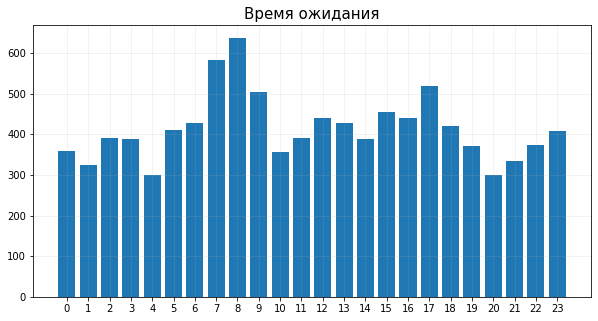

In [7]:
## CODE HERE
eta=data_orders_df.loc[:,['order_datetime','m_order_eta']]
eta['order_datetime']=pd.to_datetime(eta['order_datetime']).map(lambda x: x.hour)
eta.dropna(inplace=True)
eta_grouped=eta.groupby('order_datetime').agg({'m_order_eta': 'mean'}).reset_index()
%matplotlib inline
register_matplotlib_converters()
fig, subplot = plt.subplots(figsize=(10,5))
y_ticks=np.array(eta_grouped['m_order_eta'])
x_ticks=np.array(eta_grouped['order_datetime'])
subplot.bar(x_ticks,y_ticks)
subplot.set_title('Время ожидания', fontsize=15)
plt.grid(linewidth=0.5, alpha=0.3)
plt.xticks(x_ticks)
plt.show()

*Место для ответа*

Время до прибытия машины увеличивается утром в 7-8 утра и вечером в 17 часов, так как наверняка в это время самый высокий спрос. Вернее самое высокое соотношения кол-ва желающих заказать и кол-ва автомобилей

5. Колонка drivers_offered - показывает сколько водителей увидели заказ и могли его принять. Постройте часовую разбивку среднего количества водителей которым был предложен заказ. Что можно сказать по ней про избыток/нехватку водителей в те или иные часы?

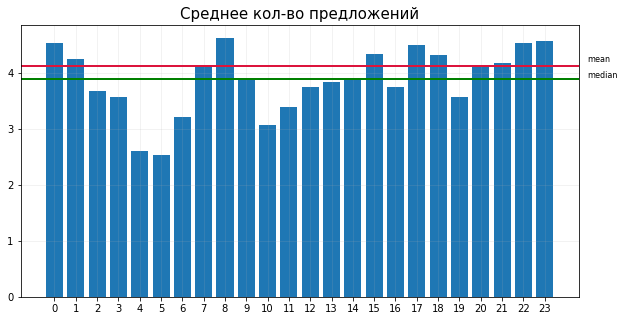

In [8]:
## CODE HERE

offers_df=pd.merge(data_offers_df, data_orders_df.loc[:,['order_datetime','order_gk']], on='order_gk')
offers_df['order_datetime']=pd.to_datetime(offers_df['order_datetime']).map(lambda x: x.hour)
offers_grouped=offers_df.groupby('order_datetime').agg({'order_gk':'nunique', 'offer_id':'nunique'}).reset_index()
offers_grouped['avg_num_off']=offers_grouped['offer_id']/offers_grouped['order_gk']
offers_mean=sum(offers_grouped['offer_id'])/sum(offers_grouped['order_gk'])
offers_median=np.median(offers_grouped['avg_num_off'])
%matplotlib inline
register_matplotlib_converters()
fig, subplot = plt.subplots(figsize=(10,5))
y_ticks=np.array(offers_grouped['avg_num_off'])
x_ticks=np.array(offers_grouped['order_datetime'])
subplot.bar(x_ticks,y_ticks)
subplot.set_title('Среднее кол-во предложений', fontsize=15)
plt.grid(linewidth=0.5, alpha=0.3)
plt.xticks(x_ticks)
plt.axhline(offers_mean,linestyle='-', color='crimson', linewidth=2)
plt.axhline(offers_median,linestyle='-', color='green', linewidth=2)
plt.text(x=25, y=4.2, s='mean', fontsize=8)
plt.text(x=25, y=3.9, s='median', fontsize=8)
plt.show()

*Место для ответа*

Заметен явный недостаток предложений в период с 4 и до 7 утра, а также небольшие просадки в 10 утра. Избыток наблюдается в 8 утра, 17 часов вечера, а также с 22 до 00 поздно вечером. 

Просадка по количеству предложений происходит в моменты наименьшего спроса, а избыток наоборот в моменты, когда спрос наиболее высок. 

**6*.** Гексаконы.
Воспользовавшись пакетами h3 и folium, посчитайте, сколько гексагонов размера 8 (https://uber.github.io/h3/#/documentation/core-library/resolution-table) содержат 80% всех заказов из исходного датасета и визуализируйте гексагон с наибольшим количеством фейлов на карте.

Для данного задания я так и не смог установить пакет h3. Прочитав документацию на GitHub я понял, что для успешной установки и работы нужны сторонние компиляторы make, cc (cc пробовал ставить через cygwin, потом просто exe файл, но кажется, что это не совсем оно) и cmake, а также необходимо добавить папку bin из их директорий в Path. После установки и добавления пути я пытался запустить установку пакета как напрямую pip install git+, так и через pip install h3, а также через PyCharm и компандную строку. Но ни в одном из случаев данный пакет у меня не установился (висела либо вечная установка, либо ошибка)

Ответ - _ гексагонов

In [10]:
import folium


m = folium.Map( zoom_start = 15)

m